# Лабораторная работа №8

## Алгоритм нечеткой кластеризации

In [45]:
from sklearn import datasets
import pandas as pd
from hvplot import pandas
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [40]:
seed = 42
n_samples = 300

X, Y = datasets.make_blobs(n_samples=n_samples, random_state=seed, centers=[[-2, -2], [2, -1], [2, 2], [-2, 1]])
df = pd.DataFrame(data=np.concatenate([X, Y.reshape(-1, 1)], axis=1), columns=['x', 'y', 'label'])
df.hvplot.scatter(x='x', y='y', by='label')

:NdOverlay   [label]
   :Scatter   [x]   (y)

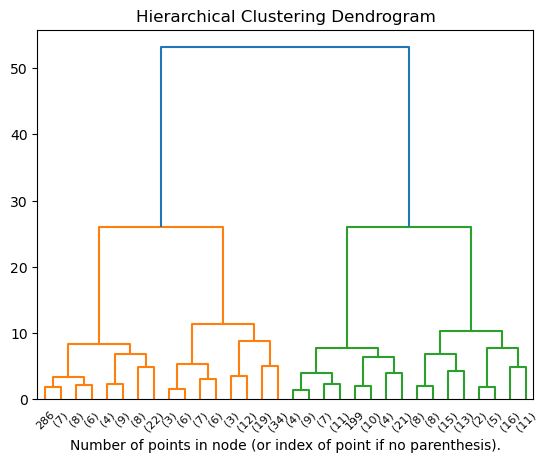

In [52]:
# Иерархический кластеризатор, поднимается снизу вверх, объединяя наиболее бизлежащие объекты в одну группу
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()